In [1]:
import pandas as pd

In [3]:
'''
Data was obtained from Scopus using the following search query:

REF ( "the nature of belief systems in mass publics" ) AND ( LIMIT-TO ( LANGUAGE , "English" ) )

and 

REF ( "structure of decision" AND axelrod ) AND ( LIMIT-TO ( LANGUAGE , "English" ) )

and

REF ( "Women, fire, and dangerous things: What categories reveal about the mind" )


All the results were exported to a CSV file, scopus.csv, and then imported into a Pandas DataFrame.
'''


nature_of_belief = pd.read_csv('data/seeds/nature_of_belief.csv').assign(seed_paper = 'nature_of_belief')
structure_of_decision = pd.read_csv('data/seeds/structure_of_decision.csv').assign(seed_paper = 'structure_of_decision')
women_fire_dangerous = pd.read_csv('data/seeds/women_fire_dangerous.csv').assign(seed_paper = 'women_fire_dangerous')

papers = pd.concat([nature_of_belief, structure_of_decision, women_fire_dangerous], ignore_index=True)

# Keywords

In [4]:
keywords = [
    # 'network',
    'network of belief',
    'networks of belief',
    'belief network',
    'beliefs network',
    'map of belief',
    'maps of belief',
    'relationship between belief',
    'cognitive map',
    'map of cognitive behavior',
    'map of opinion',
    'network of opinion',
    'networks of opinion',
    'relationship between opinion',
    'system of belief',
    'systems of belief',
    'belief system',
    'beliefs system',
    'set of opinion',
    'opinion set',
    'set of value',
    'values set',
    'system of opinion',
    'opinion system', 
    'opimions system',
    'system of value',
    'values system',
    'value system',
    'attitude network',
    'attitude map',
    'relationship between attitude',
    'attitude system',
    # 'attitude',
    'issue system'
    'factor system',
    'system of factor',
    'variable system',
    'system of variable',
    'crucial factor',
    # additional ones after 2023.11.20
    'correlational class analysis',
    'relational class analysis',
    'ideology system',
    'map of idea',
    'system of idea',
    # use things like * in scopus: "behav* network" would match behavior network and behavioural network both; from https://library.bath.ac.uk/scopus/keyword-searching
]


systematic_keywords = [
    'Belief* Network',
    'Belief* System',
    'Belief* Map',
    'Belief* Set',
    'Issue* Network',
    'Issue* System',
    'Issue* Map',
    'Issue* Set',
    'Opinion* Network',
    'Opinion* System', # keep an eye on this one
    'Opinion* Map',
    'Opinion* Set',
    # 'Value Network', catches valued networks too, physics heavy application
    # 'Values Network',
    'Value System',
    # 'Value* Map', business heavy application
    'Value Set',
    'Attitude* Network',
    'Attitude* System',
    'Attitude* Map',
    'Attitude* Set',
    # 'Cogni* Network', catches engineering and medical applications
    'Cogni* System',
    'Cogni* Map', # cognitive catches a lot of things, FUZZY exclude needed
    'Cogni* Set', 
    'Network of Belief',
    'Network of Issue',
    'Network of Opinion',
    # 'Network of Values', catching SBM stuff
    'Network of Attitudes',
    'Network of Cogni*', # FINISHED HERE 2023.11.20
    'System* of Beliefs',
    'System* of Issue',
    'System *of Opinion',
    'System* of Value',
    'System* of Attitude',
    # 'System* of Cogni*', catches neuroscience and dual process stuff
    'Map* of Belief',
    'Map* of Issue',
    'Map* of Opinion',
    # 'Map of Values',
    'Map* of Attitude',
    # 'Map of Cognitives', neuroscience heavy application
    # 'Set of Beliefs',
    # 'Set of Issues',
    # 'Set of Opinions',
    # 'Set of Values',
    # 'Set of Attitudes',
    # 'Set of Cognitives', lot of noise in all the "set" keywords
    'Relationship Between Belief',
    # 'Relationship Between of Issue' , ?
    'Relationship Between Opinion',
    'Relationship Between Value',
    'Relationship Between Attitude',
    # 'Relationship Between of Cognitives',
    "Mental Map",
]


joker_keywords = [
    
]


def generate_query(keywords):
    # Joining keywords with ' OR ' and enclosing each in quotation marks
    joined_keywords = ' OR '.join(f'"{keyword}"' for keyword in keywords)
    # Constructing the final query
    query = f'TITLE-ABS-KEY ({joined_keywords})'
    return query

query = generate_query(systematic_keywords)
print(query)


TITLE-ABS-KEY ("Belief* Network" OR "Belief* System" OR "Belief* Map" OR "Belief* Set" OR "Issue* Network" OR "Issue* System" OR "Issue* Map" OR "Issue* Set" OR "Opinion* Network" OR "Opinion* System" OR "Opinion* Map" OR "Opinion* Set" OR "Value System" OR "Value Set" OR "Attitude* Network" OR "Attitude* System" OR "Attitude* Map" OR "Attitude* Set" OR "Cogni* System" OR "Cogni* Map" OR "Cogni* Set" OR "Network of Belief" OR "Network of Issue" OR "Network of Opinion" OR "Network of Attitudes" OR "Network of Cogni*" OR "System* of Beliefs" OR "System* of Issue" OR "System *of Opinion" OR "System* of Value" OR "System* of Attitude" OR "Map* of Belief" OR "Map* of Issue" OR "Map* of Opinion" OR "Map* of Attitude" OR "Relationship Between Belief" OR "Relationship Between Opinion" OR "Relationship Between Value" OR "Relationship Between Attitude" OR "Mental Map")


## Filtering on keywords

In [7]:
# Check if the title or abstract contains any of the keywords

def scopus_query_to_regex(query):
    """
    Converts a Scopus-style query with wildcards into a regex pattern.

    Args:
    query (str): The Scopus-style query string.

    Returns:
    str: A regex pattern corresponding to the Scopus-style query.
    """
    # Split the query into words
    words = query.split()

    # Replace '*' in each word with '\S*' and add '\s+' at the end of each word
    regex_parts = [word.replace('*', '\\S*') + '\\s+' for word in words]

    # Join the parts to form the final regex pattern
    regex_pattern = ''.join(regex_parts)

    return regex_pattern


   


def check_keywords(kw_list, text):
    if isinstance(text, float):
        return False
    
    for kw in kw_list:
        if kw.lower() in text.lower():
            return True
    return False


abstract = papers.Abstract.apply(lambda x: check_keywords(keywords, x))
title = papers.Title.apply(lambda x: check_keywords(keywords, x))
auth_kws = papers['Author Keywords'].apply(lambda x: check_keywords(keywords, x))

# Combine the results
papers[
    abstract | 
    title | 
    auth_kws
    ]


,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Link,Abstract,Author Keywords,Index Keywords,Document Type,Publication Stage,Open Access,Source,EID,seed_paper
1,Enders A.; Klofstad C.; Stoler J.; Uscinski J.E.,"Enders, Adam (57200699056); Klofstad, Casey (1...",57200699056; 10340526300; 26533535500; 2417218...,How Anti-Social Personality Traits and Anti-Es...,2023,American Politics Research,51,2,NaN,247,...,https://www.scopus.com/inward/record.uri?eid=2...,Conspiracy theories and misinformation (CTM) b...,conspiracy theory; COVID-19; dark triad; Donal...,NaN,Article,Final,All Open Access; Green Open Access,Scopus,2-s2.0-85142176957,nature_of_belief
3,Tilley J.; Hobolt S.B.,"Tilley, James (7007162303); Hobolt, Sara B. (9...",7007162303; 9634821200,Brexit as an Identity: Political Identities an...,2023,PS - Political Science and Politics,56,4,NaN,546,...,https://www.scopus.com/inward/record.uri?eid=2...,The decision by a narrow majority of British v...,NaN,NaN,Conference paper,Final,All Open Access; Green Open Access; Hybrid Gol...,Scopus,2-s2.0-85168668039,nature_of_belief
4,Groenendyk E.; Kimbrough E.O.; Pickup M.,"Groenendyk, Eric (6506537141); Kimbrough, Erik...",6506537141; 35484426400; 15757997300,How Norms Shape the Nature of Belief Systems i...,2023,American Journal of Political Science,67,3,NaN,623,...,https://www.scopus.com/inward/record.uri?eid=2...,"How should ideology be understood, and should ...",NaN,NaN,Article,Final,NaN,Scopus,2-s2.0-85134518364,nature_of_belief
6,Calice M.N.; Bao L.; Freiling I.; Howell E.; X...,"Calice, Mikhaila N. (57226542498); Bao, Luye (...",57226542498; 57219894725; 57197771888; 5719384...,Polarized platforms? How partisanship shapes p...,2023,New Media and Society,25,11,NaN,2833,...,https://www.scopus.com/inward/record.uri?eid=2...,The use of artificial intelligence-based algor...,Algorithms; artificial intelligence; gatekeepi...,NaN,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85111852187,nature_of_belief
11,Mongrain P.,"Mongrain, Philippe (57202605696)",57202605696,With a little help from my friends? The impact...,2023,European Journal of Political Research,62,4,NaN,1320,...,https://www.scopus.com/inward/record.uri?eid=2...,Partisan preferences usually stand out as the ...,citizen forecasting; contact model; expectatio...,NaN,Article,Final,NaN,Scopus,2-s2.0-85144013284,nature_of_belief
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12628,Strong G.W.; Whitehead B.A.,"Strong, Gary W. (35966959200); Whitehead, Bruc...",35966959200; 7005200466,A solution to the tag-assignment problem for n...,1989,Behavioral and Brain Sciences,12,3,NaN,381,...,https://www.scopus.com/inward/record.uri?eid=2...,Purely parallel neural networks can model obje...,affordance; attention; connectionist network; ...,NaN,Article,Final,NaN,Scopus,2-s2.0-84971765284,women_fire_dangerous
12635,Plaut D.C.,"Plaut, David C (57207497092)",57207497092,Neural networks and computational theory: Solv...,1989,Behavioral and Brain Sciences,12,3,NaN,411,...,https://www.scopus.com/inward/record.uri?eid=2...,[No abstract available],NaN,NaN,Article,Final,NaN,Scopus,2-s2.0-84971735697,women_fire_dangerous
12643,Kruschke J.K.,"Kruschke, John K. (7004103690)",7004103690,State transitions in constraint satisfaction n...,1989,Behavioral and Brain Sciences,12,3,NaN,407,...,https://www.scopus.com/inward/record.uri?eid=2...,[No abstract available],NaN,NaN,Article,Final,NaN,Scopus,2-s2.0-84971791514,women_fire_dangerous
12694,Boyce W.T.; Kay M.; Uitti C.,"Boyce, W.Thomas (56432345900); Kay, Margarita ...",56432345900; 7202188488; 7801372570,The taxonomy of social support: An ethnographi...,1988,Social Science and Medicine,26,11,NaN,1079,...,https://www.scopus.com/inward/record.uri?eid=2...,Current approaches to assessing the health-rel...,adolescent mothers; social networks; social su...,Adolescent; Classification; Cognition;

## Keyword frequencies

In [9]:
def keyword_frequency(seed_paper_category, keyword, columns=['Title', 'Abstract', 'Author Keywords']):
    keyword_count = 0
    subset_papers = papers[papers['seed_paper'] == seed_paper_category]
    
    for col in columns:
        keyword_count += subset_papers[col].apply(lambda x: keyword.lower() in str(x).lower()).sum()
        
    return keyword_count

# Creating a list to store the results
result_df = []

for seed_paper_category in papers['seed_paper'].unique():
    for kw in keywords:
        frequency = keyword_frequency(seed_paper_category, kw)
        result_df.append({'seed_paper': seed_paper_category,
                                      'keyword': kw,
                                      'frequency': frequency})


# Convert the list of dictionaries into a DataFrame
result_df = pd.DataFrame(result_df)

# Create a pivot table with 'keyword' as the index, 'seed_paper' as columns, and 'frequency' as values
pivot_table = result_df.pivot_table(index='keyword', columns='seed_paper', values='frequency', aggfunc='sum')


# Display the pivot table, where not all columns are zeros
pivot_table.loc[(pivot_table!=0).any(axis=1)]


seed_paper,nature_of_belief,structure_of_decision,women_fire_dangerous
keyword,,,
attitude,1617,30,114
attitude network,5,0,0
attitude system,2,0,0
belief network,14,31,0
belief system,233,42,7
cognitive map,8,2378,13
crucial factor,3,0,2
network,258,441,404
opinion set,1,0,0


# Embeddings

In [26]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict

# Assuming 'papers' is your DataFrame and 'Abstracts' is the column with text data
# Make sure to preprocess your text (e.g., lowercasing, removing punctuation)
# Here's a simple tokenizer function that also removes stopwords
def tokenize(text):
    stop_words = set(stopwords.words('english'))
    return [word for word in word_tokenize(text.lower()) if word.isalpha() and word not in stop_words]

# Tokenize the abstracts
papers['tokenized_abstracts'] = papers['Abstract'].apply(tokenize)

# Train a Word2Vec model or load a pre-trained one
# For the example, we're training a new model on the abstracts
model = Word2Vec(sentences=papers['tokenized_abstracts'], vector_size=100, window=5, min_count=1, workers=4)

# Define a function to average word vectors for a document
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    nwords = 0.

    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector


# Get the Word2Vec model vocabulary
vocab = set(model.wv.index_to_key)



/Users/bocsar000/.pyenv/versions/3.10.13/envs/scopus_scrape/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


                                           avg_word2vec  \
0     [0.15551154, 0.4843057, -0.063843034, -0.12856...   
1     [0.0017258335, 0.6096328, -0.068927474, -0.076...   
2     [-0.20611556, 0.4250914, 0.32713714, -0.062033...   
3     [-0.051825833, 0.43890238, 0.04432644, -0.0149...   
4     [0.022352302, 0.6387013, 0.07324514, -0.117399...   
...                                                 ...   
6354  [-0.08334337, 0.3148329, 0.04779819, 0.0082024...   
6355  [-0.18945162, 0.50257474, 0.4241818, -0.081269...   
6356  [-0.109972484, 0.3742927, 0.11006194, -0.00462...   
6357  [-0.5276574, 0.3469131, 0.18516265, -0.150177,...   
6358  [-0.11751811, 0.33437216, 0.19116303, -0.04253...   

                                tfidf_weighted_word2vec  
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

def keyword_similarity(seed_paper_category, keyword_vector, columns=['Abstract'], threshold=0.5):
    similarity_count = 0
    subset_papers = papers[papers['seed_paper'] == seed_paper_category]
    
    # Calculate similarity for each paper in the subset
    for index, paper in subset_papers.iterrows():
        for col in columns:
            # Tokenize the text in the column
            text_tokens = tokenize(str(paper[col]))
            # Skip empty columns to avoid errors
            if not text_tokens:
                continue
            # Get the Word2Vec vector for each word in the column
            col_vectors = [model.wv[word] for word in text_tokens if word in model.wv]
            # If there are no vectors, skip this column
            if not col_vectors:
                continue
            # Calculate average vector for the column
            avg_col_vector = np.mean(col_vectors, axis=0).reshape(1, -1)
            # Calculate cosine similarity between keyword vector and column vector
            sim = cosine_similarity(keyword_vector, avg_col_vector)[0][0]
            # If the similarity is above the threshold, increment the count
            if sim > threshold:
                similarity_count += 1
                
    return similarity_count

# Creating a list to store the results
result_df = []

# Convert keywords into Word2Vec vectors
keyword_vectors = {kw: average_word_vectors(tokenize(kw), model, vocab, 100).reshape(1, -1) for kw in keywords}

for seed_paper_category in papers['seed_paper'].unique():
    for kw, kw_vector in keyword_vectors.items():
        frequency = keyword_similarity(seed_paper_category, kw_vector, threshold=0.8)
        result_df.append({'seed_paper': seed_paper_category,
                          'keyword': kw,
                          'similarity_count': frequency})

# Convert the list of dictionaries into a DataFrame
result_df = pd.DataFrame(result_df)

# Create a pivot table with 'keyword' as the index, 'seed_paper' as columns, and 'similarity_count' as values
pivot_table = result_df.pivot_table(index='keyword', columns='seed_paper', values='similarity_count', aggfunc='sum')

# Display the pivot table
pivot_table


seed_paper,nature_of_belief,structure_of_decision
keyword,,
belief system,6,5
beliefs system,732,611
opimions system,3,27
opinion set,40,1
opinion system,7,0
set of opinion,40,1
system of belief,6,5
system of opinion,7,0
system of value,205,1082


In [28]:


# Function to calculate cosine similarity and filter papers
def filter_papers_by_keyword_similarity(df, keywords, threshold=0.5, columns=['Title', 'Abstract', 'Author Keywords']):
    # Tokenize and vectorize the keywords
    keyword_vectors = {kw: average_word_vectors(tokenize(kw), model, set(model.wv.index_to_key), model.vector_size)
                       for kw in keywords}

    # Helper function to calculate the maximum similarity of a text to any keyword
    def max_similarity_to_keywords(text, keyword_vectors):
        tokens = tokenize(text)
        vectors = [model.wv[token] for token in tokens if token in model.wv]
        if not vectors:
            return 0
        text_vector = np.mean(vectors, axis=0).reshape(1, -1)
        max_sim = max(cosine_similarity(text_vector, np.array(list(keyword_vectors.values())))[0])
        return max_sim

    # List to keep track of rows with similarity above threshold
    rows_above_threshold = []

    # Iterate over each row in the DataFrame
    for _, row in df.iterrows():
        row_similarity = 0
        # Check similarity for specified columns
        for col in columns:
            col_similarity = max_similarity_to_keywords(str(row[col]), keyword_vectors)
            row_similarity = max(row_similarity, col_similarity)
        # If similarity for any column is above the threshold, add the row to the list
        if row_similarity > threshold:
            rows_above_threshold.append(row)

    # Return a DataFrame with only the rows above the similarity threshold
    return pd.DataFrame(rows_above_threshold)

# Example usage:
# papers is your original DataFrame, keywords is your list of keywords, and threshold is the similarity threshold
filtered_papers = filter_papers_by_keyword_similarity(papers, keywords, threshold=0.8)


In [29]:
filtered_papers


,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Index Keywords,Document Type,Publication Stage,Open Access,Source,EID,seed_paper,tokenized_abstracts,avg_word2vec,tfidf_weighted_word2vec
1,Enders A.; Klofstad C.; Stoler J.; Uscinski J.E.,"Enders, Adam (57200699056); Klofstad, Casey (1...",57200699056; 10340526300; 26533535500; 2417218...,How Anti-Social Personality Traits and Anti-Es...,2023,American Politics Research,51,2,NaN,247,...,NaN,Article,Final,All Open Access; Green Open Access,Scopus,2-s2.0-85142176957,nature_of_belief,"[conspiracy, theories, misinformation, ctm, be...","[0.0017258335, 0.6096328, -0.068927474, -0.076...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Groenendyk E.; Kimbrough E.O.; Pickup M.,"Groenendyk, Eric (6506537141); Kimbrough, Erik...",6506537141; 35484426400; 15757997300,How Norms Shape the Nature of Belief Systems i...,2023,American Journal of Political Science,67,3,NaN,623,...,NaN,Article,Final,NaN,Scopus,2-s2.0-85134518364,nature_of_belief,"[ideology, understood, concerned, americans, l...","[0.022352302, 0.6387013, 0.07324514, -0.117399...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,Rettig L.; Gärtner L.; Schoen H.,"Rettig, Leonie (58040381000); Gärtner, Lea (57...",58040381000; 57218796116; 7006886875,Facing trade-offs: The variability of public s...,2023,Environmental Science and Policy,147,NaN,NaN,244,...,Germany; climate change; conflict management; ...,Article,Final,All Open Access; Bronze Open Access,Scopus,2-s2.0-85164024846,nature_of_belief,"[policy, support, often, measured, asking, res...","[0.058773663, 0.57156825, -0.023501812, -0.133...","[-0.24882661, 0.6500706, 0.39193612, -0.008946..."
8,Enninga J.; Yonk R.M.,"Enninga, Justus (58220513900); Yonk, Ryan M. (...",58220513900; 35294612100,Achieving Ecological Reflexivity: The Limits o...,2023,Sustainability (Switzerland),15,8,6396,NaN,...,democracy; ecological economics; environmental...,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85156147516,nature_of_belief,"[environmental, problems, often, highly, compl...","[-0.057574674, 0.36406302, 0.2366163, -0.10191...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
11,Mongrain P.,"Mongrain, Philippe (57202605696)",57202605696,With a little help from my friends? The impact...,2023,European Journal of Political Research,62,4,NaN,1320,...,NaN,Article,Final,NaN,Scopus,2-s2.0-85144013284,nature_of_belief,"[partisan, preferences, usually, stand, major,...","[0.04492471, 0.6141413, 0.10414245, -0.1255418...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,Chan S.,"Chan, Steve (8271623500)",8271623500,"Rationality, Bureaucratic Politics and Belief ...",1979,Journal of Peace Research,16,4,NaN,333,...,NaN,Article,Final,NaN,Scopus,2-s2.0-84970399843,structure_of_decision,"[understanding, belief, systems, foreign, poli...","[-0.05347046, 0.36750832, 0.19520402, 0.038313...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6347,Eden C.; Sims D.,"Eden, Colin (7006244321); Sims, David (7101600...",7006244321; 7101600761,On the nature of problems in consulting practice,1979,Omega,7,2,NaN,119,...,NaN,Article,Final,NaN,Scopus,2-s2.0-0001098817,structure_of_decision,"[consultants, wish, help, clients, complex, po...","[-0.055449385, 0.3924494, 0.24187995, -0.07019...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6348,Eden C.,"Eden, Colin (7006244321)",7006244321,Modelling the influence of decision makers on ...,1977,Futures,9,4,NaN,272,...,NaN,Article,Final,NaN,Scopus,2-s2.0-34247992941,structure_of_decision,"[article, describes, attempts, use, futures, r...","[-0.14518416, 0.36221546, 0.3672079, -0.110461...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6352,Lendaris G.G.,"Lendaris, George G. (7003527565)",7003527565,Structural Modeling—A Tutorial Guide,1980,"IEEE Transactions on Systems, Man, and Cy

# Topic Modeling

100%|██████████| 18/18 [01:52<00:00,  6.26s/it]


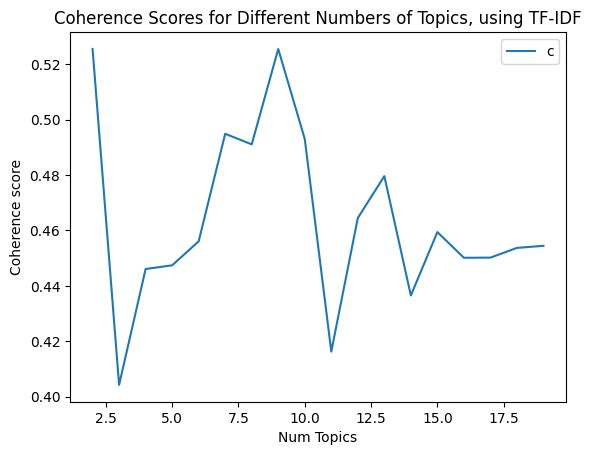

In [30]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import gensim.corpora as corpora
from gensim.models import TfidfModel
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from tqdm import tqdm

# Download stopwords from NLTK if you haven't already
# nltk.download('stopwords')
# nltk.download('punkt')


# Preprocessing the text in the 'Abstract' column
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]  # Keeping only alphabetical strings
    tokens = [word for word in tokens if len(word) >= 3]  # Keeping words with at least three characters
    tokens = [word for word in tokens if word not in stop_words]  # Removing stopwords
    return tokens

df = filtered_papers

# Applying preprocessing to each abstract in the DataFrame
df['tokens'] = df['Abstract'].apply(preprocess_text)

# Creating a dictionary and corpus for LDA
dictionary = corpora.Dictionary(df['tokens'])
bow_corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Creating a TF-IDF model and transforming the corpus
tfidf_model = TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Calculating coherence values for different numbers of topics
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=tfidf_corpus, texts=df['tokens'], start=2, limit=20, step=1)

# Plotting coherence values
x = range(2, 20, 1)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Coherence Scores for Different Numbers of Topics, using TF-IDF')
plt.show()


In [32]:
def print_topics(lda_model, num_words=5):
    for index, topic in lda_model.print_topics(num_words=num_words):
        terms = []
        term_weight_pairs = topic.split(' + ')
        for pair in term_weight_pairs:
            weight, term = pair.split('*')
            terms.append(term.strip('"'))
        print(f"Topic {index+1}: {', '.join(terms)}")


# Select the model with the highest coherence and visualize the topics
optimal_model = model_list[coherence_values.index(max(coherence_values))]

# elbow rule, we want model with highest coherence score before flattening out
elbow_rule_model = model_list[8]


# Example usage:
print("Optimal Model:")
print_topics(optimal_model)
print('\n\n')


print("Elbow Rule Model:")
print_topics(elbow_rule_model)

Optimal Model:
Topic 1: abstract, available, fuzzy, model, cognitive
Topic 2: cognitive, maps, fcm, fuzzy, causal



Elbow Rule Model:
Topic 1: marketing, drought, knowledge, political, tmt
Topic 2: abstract, available, fcm, fuzzy, fcms
Topic 3: fuzzy, maps, cognitive, fcm, model
Topic 4: management, problem, knowledge, strategic, mental
Topic 5: causal, maps, teams, systems, agents
Topic 6: risks, privacy, administrative, erp, semantic
Topic 7: modeling, cognitive, environmental, turnover, planning
Topic 8: available, abstract, cognitive, knowledge, managers
Topic 9: fcm, cognitive, fuzzy, maps, map
Topic 10: abstract, available, organisation, organizational, ontology


In [33]:
vis = gensimvis.prepare(elbow_rule_model, tfidf_corpus, dictionary)
pyLDAvis.display(vis)